/tmp/ipython-input-3592574564.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=partner_counts_filtered.index, y=partner_counts_filtered.values, palette='viridis')


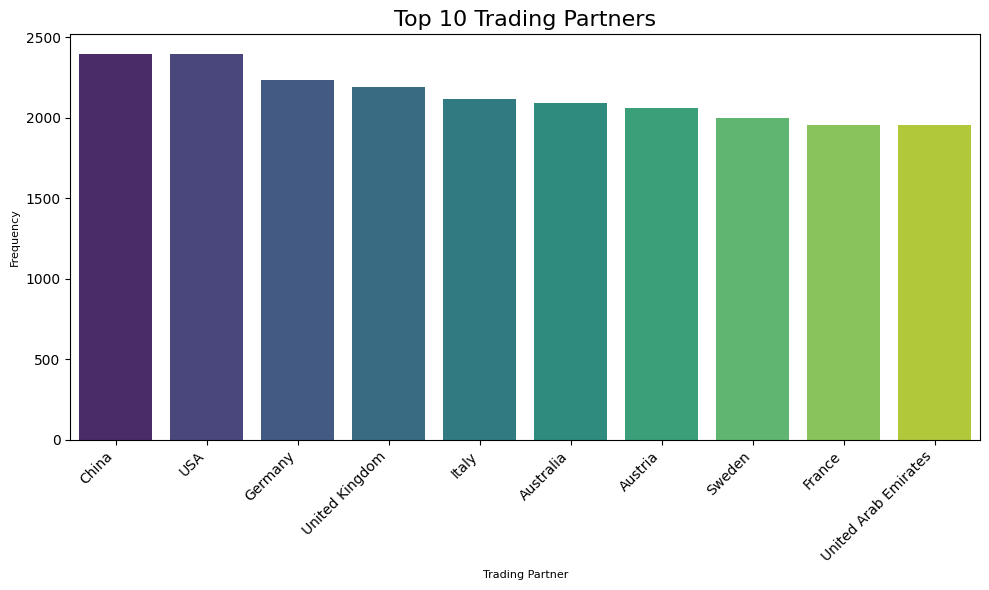

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('New_data.csv')

# --- Data Cleaning and Filtering ---
# Filter out rows where the 'partnerDesc' is 'World'
df_filtered = df[df['partnerDesc'] != 'World'].copy()

# --- Data Analysis ---
# Count the occurrences of each trading partner in the filtered data
# Then, select the top 10 most frequent partners
partner_counts_filtered = df_filtered['partnerDesc'].value_counts().nlargest(10)

# --- Plotting ---
# Create a bar chart to visualize the top 10 trading partners
plt.figure(figsize=(10,6))
sns.barplot(x=partner_counts_filtered.index, y=partner_counts_filtered.values, palette='viridis')

# Set the title and labels for clarity
plt.title('Top 10 Trading Partners', fontsize=16)
plt.xlabel('Trading Partner', fontsize=8)
plt.ylabel('Frequency', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

/tmp/ipython-input-423665380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transport_mode_counts.index, y=transport_mode_counts.values, palette='viridis')


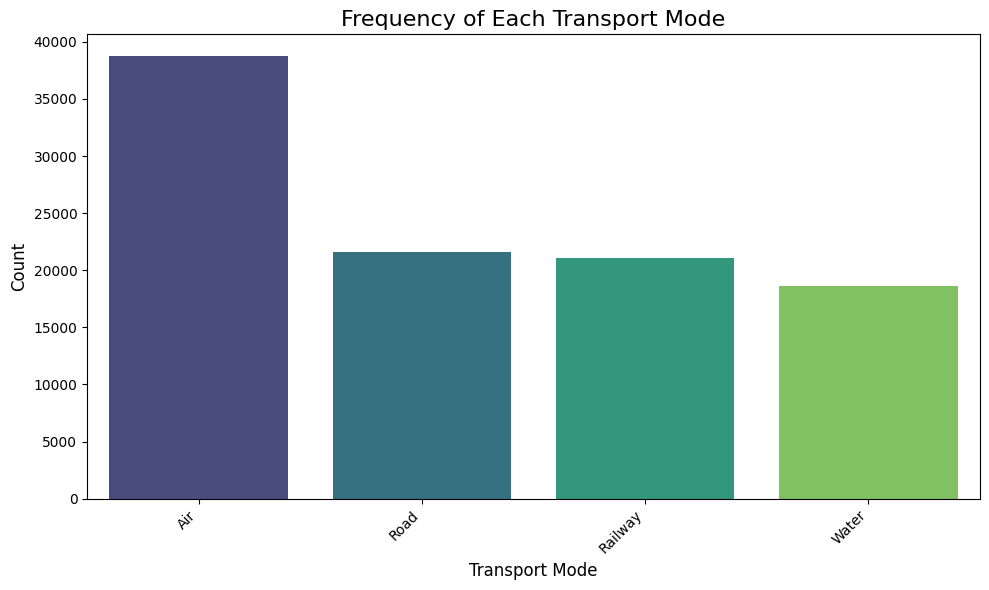

In [ ]:
plt.figure(figsize=(10, 6))
transport_mode_counts = df['transportMode'].value_counts()

sns.barplot(x=transport_mode_counts.index, y=transport_mode_counts.values, palette='viridis')

# Set the title and labels for the chart
plt.title('Frequency of Each Transport Mode', fontsize=16)
plt.xlabel('Transport Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipython-input-3440605938.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cmds.values, y=top_cmds.index, palette="cubehelix")


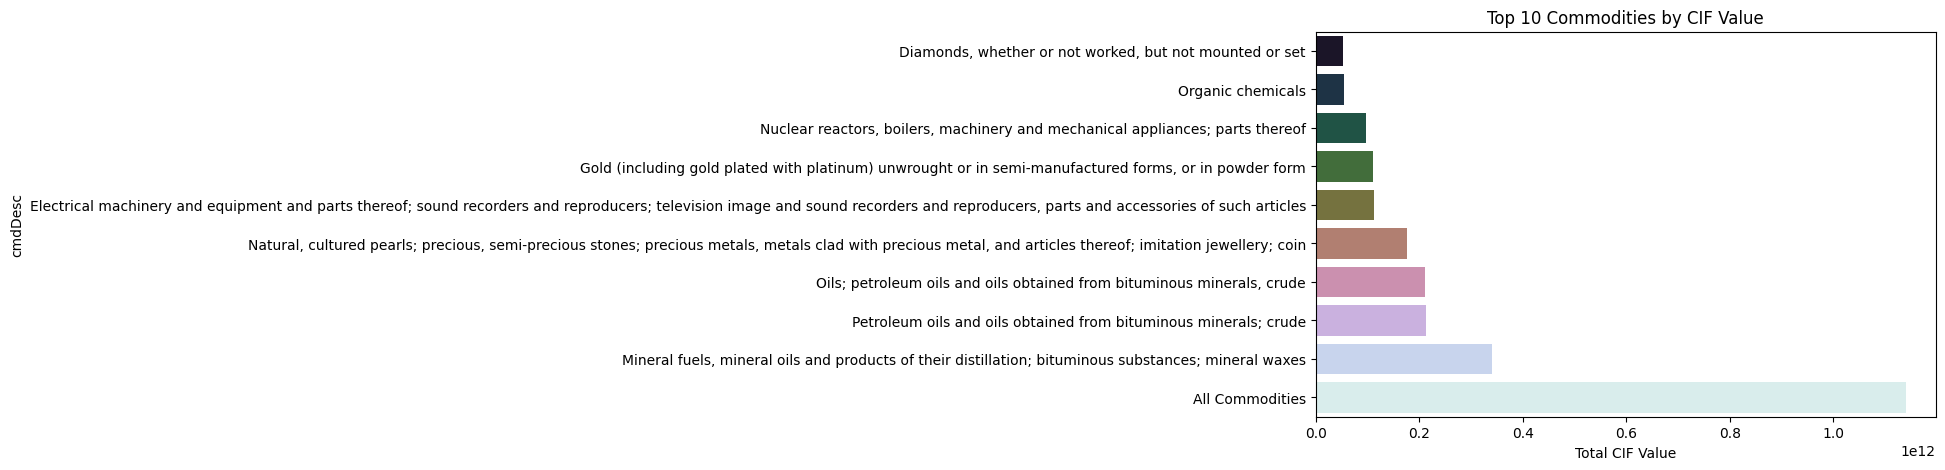

In [ ]:
top_cmds = (
    df.groupby("cmdDesc")["cifvalue"].sum()
      .nlargest(10)
      .sort_values()
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cmds.values, y=top_cmds.index, palette="cubehelix")
plt.title("Top 10 Commodities by CIF Value")
plt.xlabel("Total CIF Value")
plt.show()


/tmp/ipython-input-2945181323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="transportMode", data=df, order=df["transportMode"].value_counts().index, palette="Set2")


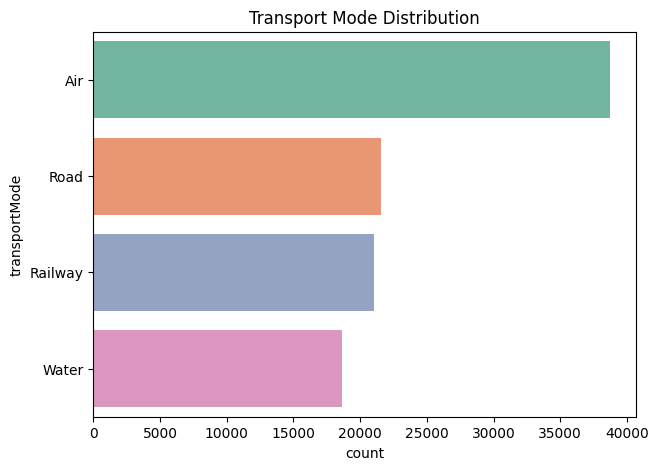

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(y="transportMode", data=df, order=df["transportMode"].value_counts().index, palette="Set2")
plt.title("Transport Mode Distribution")
plt.show()


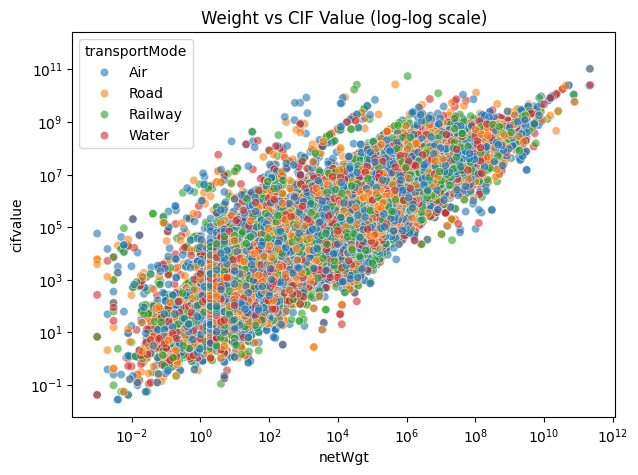

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="netWgt", y="cifvalue", hue="transportMode", alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.title("Weight vs CIF Value (log-log scale)")
plt.show()


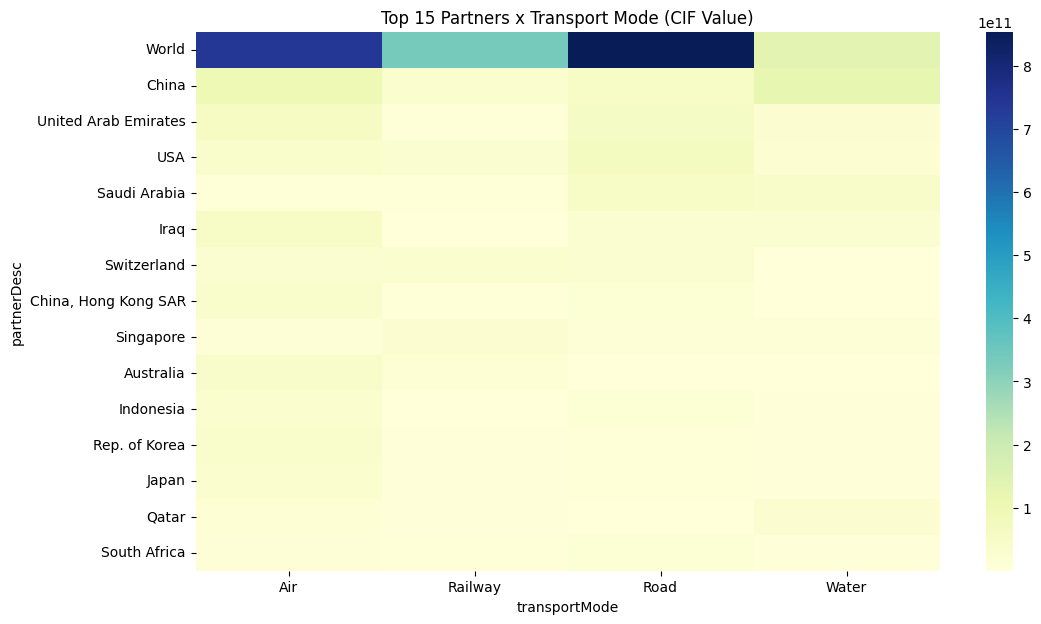

In [ ]:
# 1. Pivot the data to get CIF value for each partner and transport mode
heat_data = df.pivot_table(index="partnerDesc", columns="transportMode", values="cifvalue", aggfunc="sum")

# 2. Sum the CIF values across transport modes to find the total for each partner
#    This creates a new column called 'total_cifvalue'
heat_data['total_cifvalue'] = heat_data.sum(axis=1)

# 3. Get the top 15 partners based on their total CIF value
top_15_partners = heat_data.nlargest(15, 'total_cifvalue')

# 4. Drop the temporary 'total_cifvalue' column
top_15_partners = top_15_partners.drop(columns='total_cifvalue')

# 5. Create the heatmap with the filtered data
plt.figure(figsize=(12,7))
sns.heatmap(top_15_partners, cmap="YlGnBu", annot=False)
plt.title("Top 15 Partners x Transport Mode (CIF Value)")
plt.show()

/tmp/ipython-input-1338535130.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weight_partners.values, y=top_weight_partners.index, palette="coolwarm")


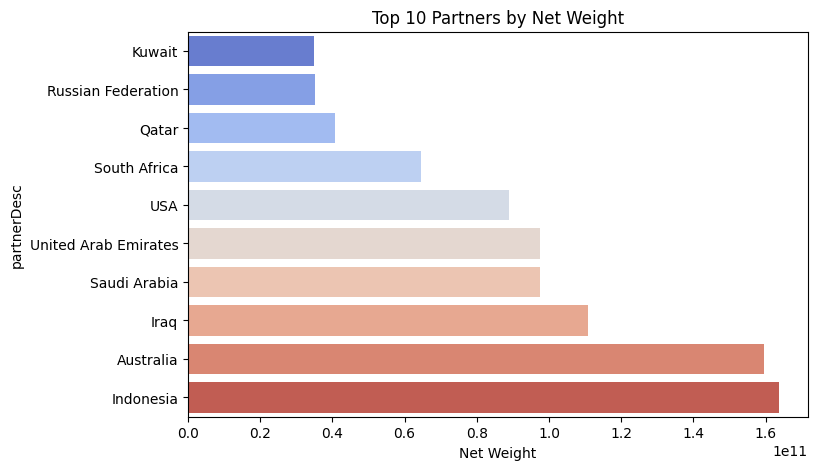

In [ ]:
# Remove 'World' rows
filtered_df = df[df["partnerDesc"] != "World"]

# Top 10 partners by Net Weight
top_weight_partners = (
    filtered_df.groupby("partnerDesc")["netWgt"].sum()
    .nlargest(10)
    .sort_values()
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_weight_partners.values, y=top_weight_partners.index, palette="coolwarm")
plt.title("Top 10 Partners by Net Weight")
plt.xlabel("Net Weight")
plt.show()


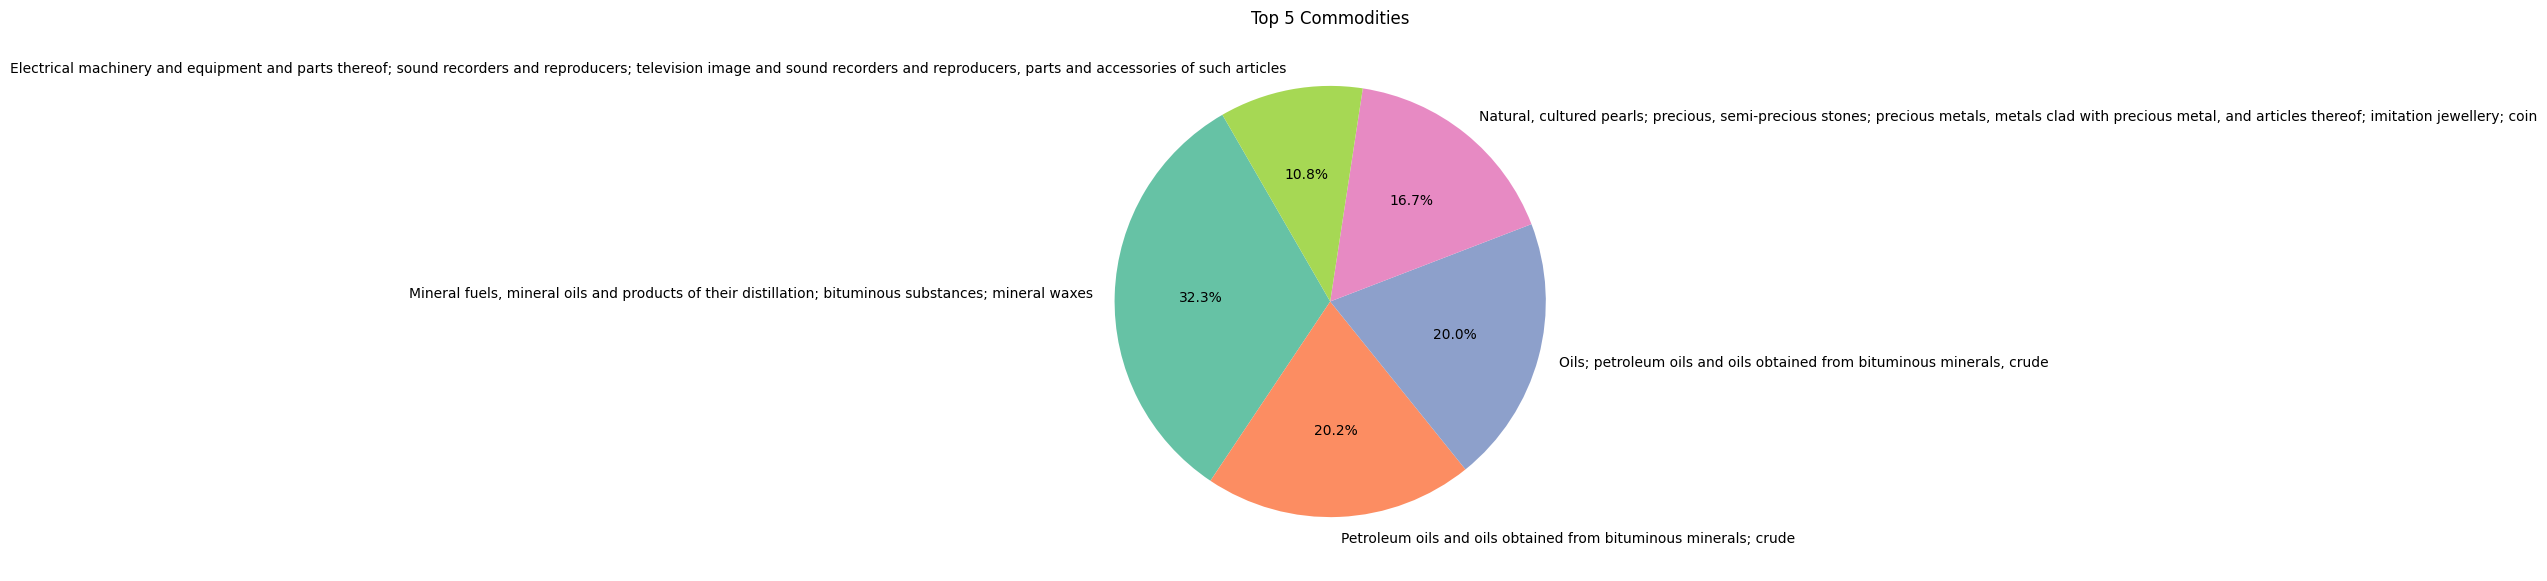

In [ ]:

top6 = df.groupby("cmdDesc")["cifvalue"].sum().nlargest(6)

# Skip the 1st (highest one)
top6_except_first = top6.iloc[1:]

# Values & labels
values = top6_except_first.values
labels = top6_except_first.index

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=120,
        colors=sns.color_palette("Set2"))
plt.title("Top 5 Commodities")
plt.show()


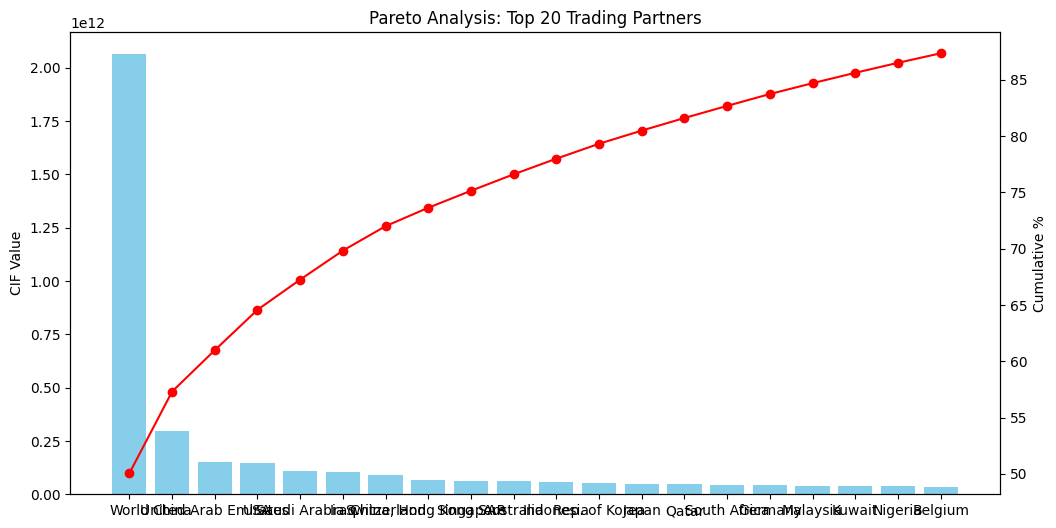

In [ ]:
partner_values = df.groupby("partnerDesc")["cifvalue"].sum().sort_values(ascending=False)
cum_percentage = partner_values.cumsum()/partner_values.sum()*100

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(partner_values.index[:20], partner_values.values[:20], color="skyblue")
ax2 = ax1.twinx()
ax2.plot(partner_values.index[:20], cum_percentage.values[:20], color="red", marker="o")

ax1.set_ylabel("CIF Value")
ax2.set_ylabel("Cumulative %")
plt.xticks(rotation=75)
plt.title("Pareto Analysis: Top 20 Trading Partners")
plt.show()


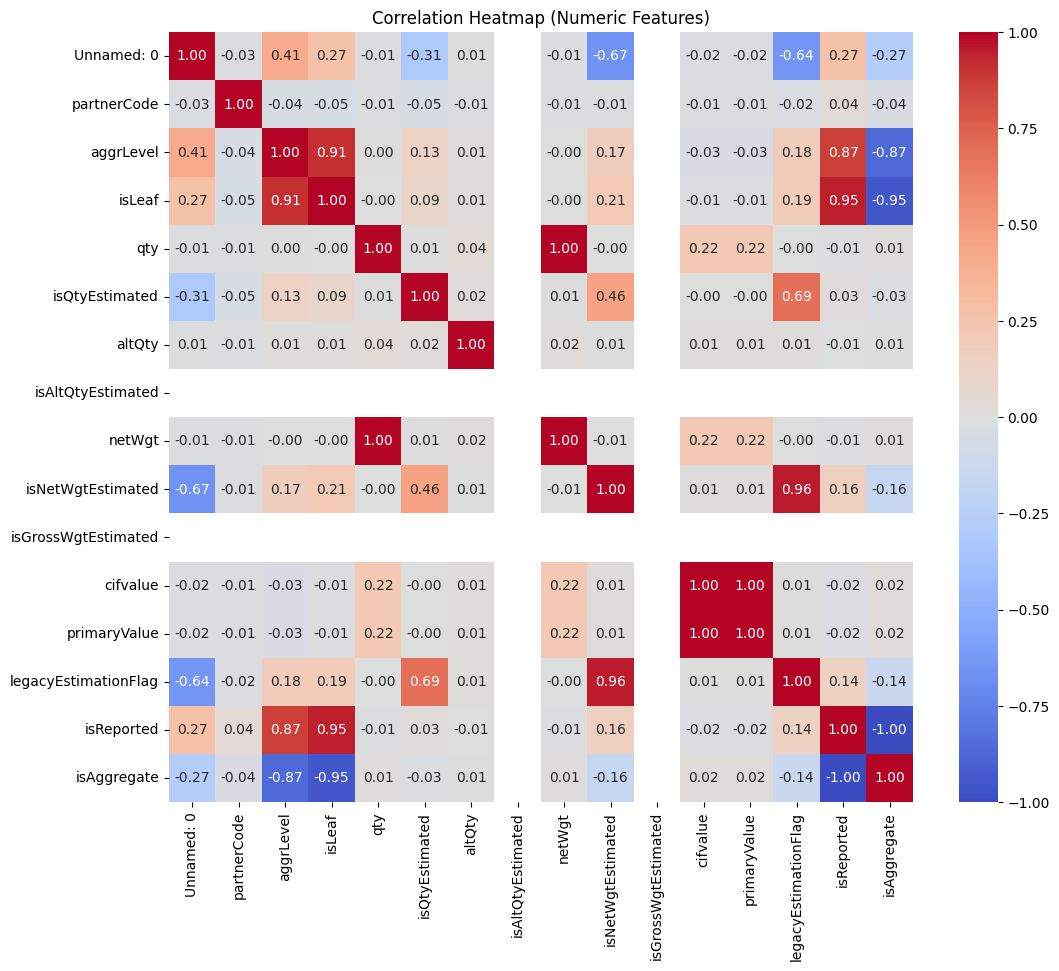

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


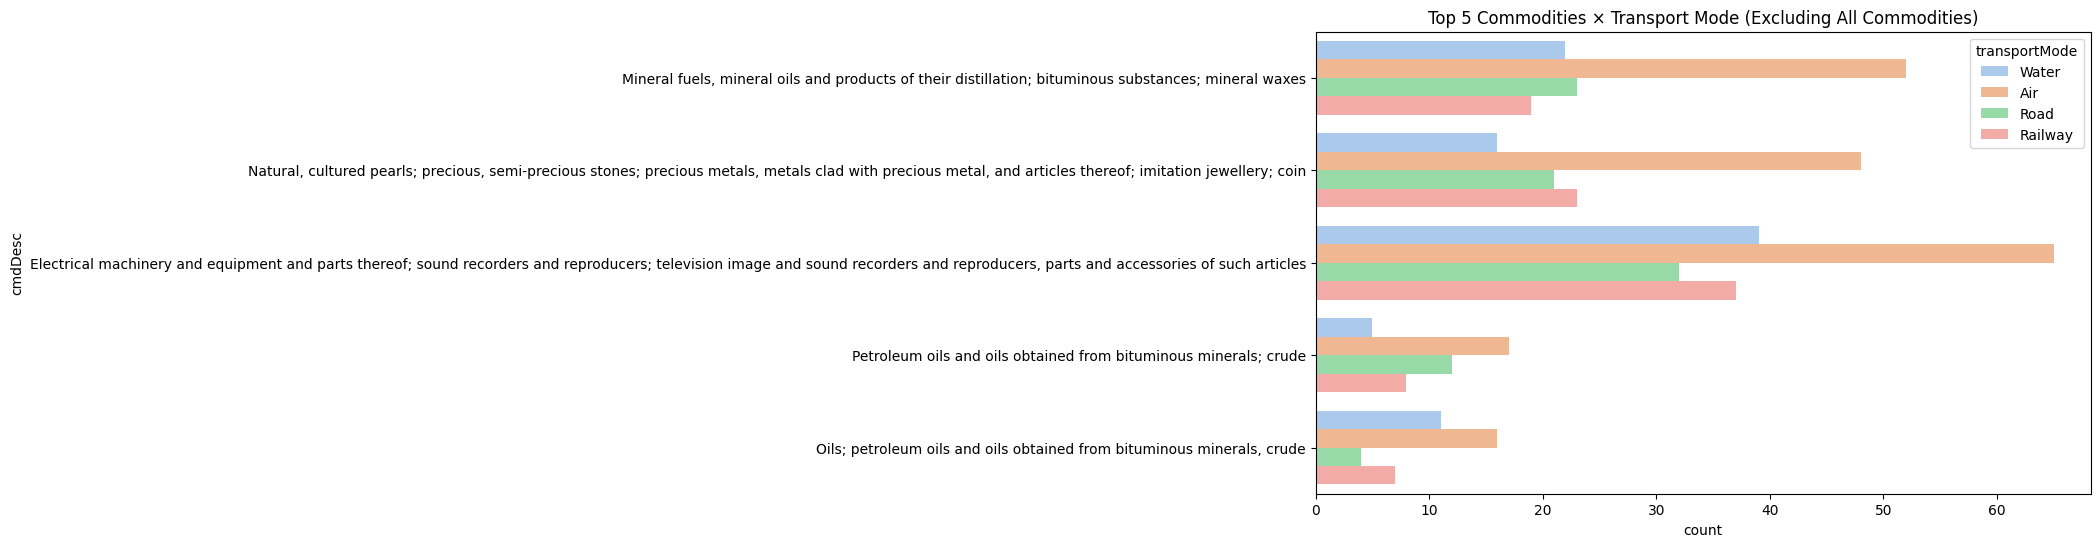

In [ ]:
# Top 5 commodities excluding 'All Commodities'
top5_cmds = (
    df[df["cmdDesc"] != "All Commodities"]   # exclude
      .groupby("cmdDesc")["cifvalue"].sum()
      .nlargest(5)
      .index
)

filtered = df[df["cmdDesc"].isin(top5_cmds)]

plt.figure(figsize=(10,6))
sns.countplot(data=filtered, y="cmdDesc", hue="transportMode", palette="pastel")
plt.title("Top 5 Commodities × Transport Mode (Excluding All Commodities)")
plt.show()


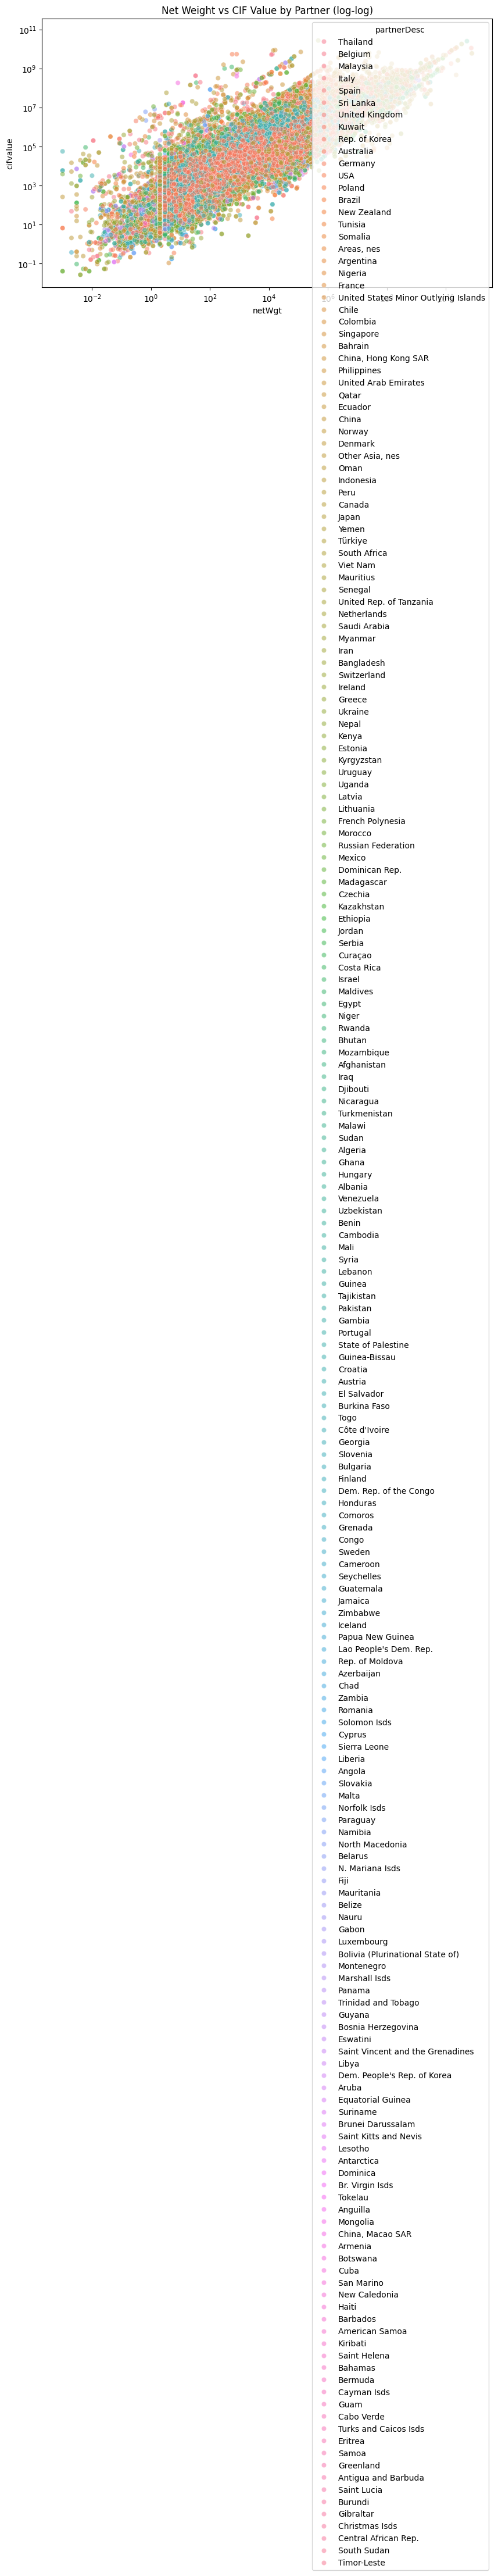

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df["partnerDesc"] != "World"],
                x="netWgt", y="cifvalue", hue="partnerDesc", alpha=0.5)
plt.xscale("log"); plt.yscale("log")
plt.title("Net Weight vs CIF Value by Partner (log-log)")
plt.show()


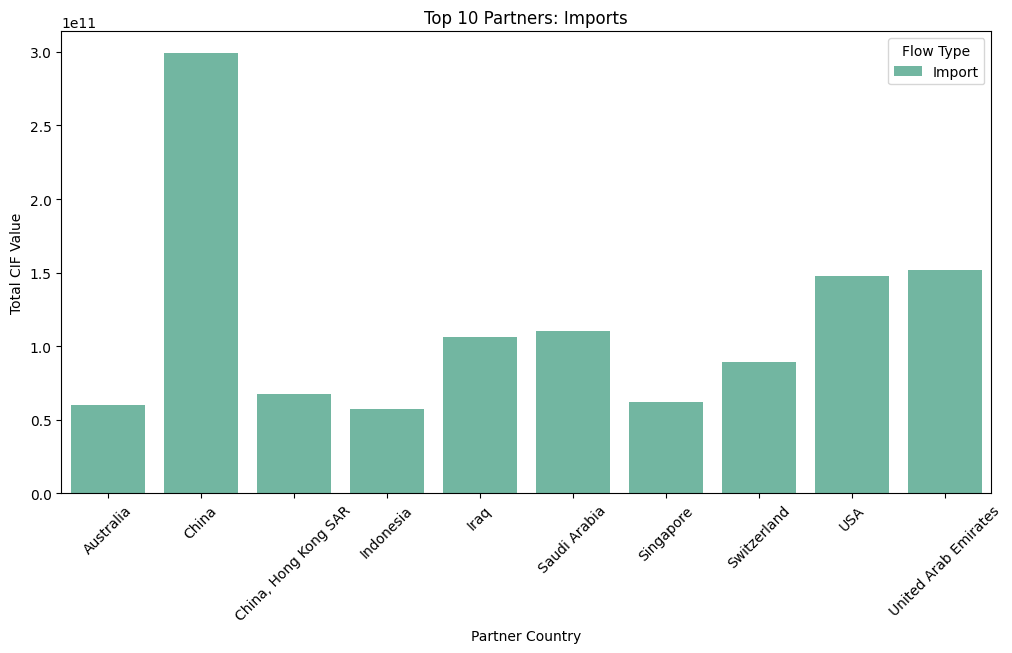

In [ ]:
# Exclude "World"
filtered = df[df["partnerDesc"] != "World"]

# Top 10 partners by total trade value
top10_partners = (
    filtered.groupby("partnerDesc")["cifvalue"].sum()
    .nlargest(10).index
)

# Filter dataset
top10_df = filtered[filtered["partnerDesc"].isin(top10_partners)]

# Aggregate Partner × Flow
partner_flow = (
    top10_df.groupby(["partnerDesc","flowDesc"])["cifvalue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=partner_flow, x="partnerDesc", y="cifvalue", hue="flowDesc", palette="Set2")

plt.xticks(rotation=45)
plt.title("Top 10 Partners: Imports")
plt.ylabel("Total CIF Value")
plt.xlabel("Partner Country")
plt.legend(title="Flow Type")
plt.show()
